In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [7]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b01a5b1b156a82754b79203c78f24cf


In [9]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b01a5b1b156a82754b79203c78f24cf&q=Boston


In [10]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 36.01,
  'feels_like': 29.08,
  'temp_min': 31.66,
  'temp_max': 38.28,
  'pressure': 1016,
  'humidity': 53},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 360},
 'clouds': {'all': 40},
 'dt': 1673388237,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1673352756,
  'sunset': 1673386219},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Import the time library and datetime module from the datetime library
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | samusu
City not found. Skipping...
Processing Record 8 of Set 1 | monte santo de minas
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | talaya
Processing Record 13 of Set 1 | provideniya
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | constitucion
Processing Record 16 of Set 1 | portland
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | porvoo
Processing Record 20 of Set 1 | viligili
City not found. Skipping...
Processing Record 21 of Se

Processing Record 36 of Set 4 | maniitsoq
Processing Record 37 of Set 4 | boa vista
Processing Record 38 of Set 4 | dikson
Processing Record 39 of Set 4 | hilo
Processing Record 40 of Set 4 | dubovka
Processing Record 41 of Set 4 | zyryanka
Processing Record 42 of Set 4 | kawalu
Processing Record 43 of Set 4 | hambantota
Processing Record 44 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 45 of Set 4 | mount gambier
Processing Record 46 of Set 4 | capaci
Processing Record 47 of Set 4 | parga
Processing Record 48 of Set 4 | stavern
Processing Record 49 of Set 4 | chapais
Processing Record 50 of Set 4 | tshane
Processing Record 1 of Set 5 | santiago de cao
Processing Record 2 of Set 5 | trapani
Processing Record 3 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 5 | aklavik
Processing Record 5 of Set 5 | okhotsk
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | eureka
Processing Record 8 of 

Processing Record 23 of Set 8 | panzhihua
Processing Record 24 of Set 8 | nyurba
Processing Record 25 of Set 8 | moengo
Processing Record 26 of Set 8 | purpe
Processing Record 27 of Set 8 | boffa
Processing Record 28 of Set 8 | mubi
Processing Record 29 of Set 8 | college
Processing Record 30 of Set 8 | soyo
Processing Record 31 of Set 8 | honiara
Processing Record 32 of Set 8 | olafsvik
Processing Record 33 of Set 8 | fairbanks
Processing Record 34 of Set 8 | teguldet
Processing Record 35 of Set 8 | mezen
Processing Record 36 of Set 8 | upernavik
Processing Record 37 of Set 8 | hailey
Processing Record 38 of Set 8 | mariinsk
Processing Record 39 of Set 8 | goderich
Processing Record 40 of Set 8 | koumac
Processing Record 41 of Set 8 | severo-kurilsk
Processing Record 42 of Set 8 | rio de janeiro
Processing Record 43 of Set 8 | tarko-sale
Processing Record 44 of Set 8 | mirabad
Processing Record 45 of Set 8 | catio
Processing Record 46 of Set 8 | khelyulya
Processing Record 47 of Set 8

Processing Record 11 of Set 12 | grindavik
Processing Record 12 of Set 12 | nome
Processing Record 13 of Set 12 | ferme-neuve
Processing Record 14 of Set 12 | guilin
Processing Record 15 of Set 12 | oshnaviyeh
Processing Record 16 of Set 12 | iacu
Processing Record 17 of Set 12 | lanxi
Processing Record 18 of Set 12 | harper
Processing Record 19 of Set 12 | rostusa
Processing Record 20 of Set 12 | mazyr
Processing Record 21 of Set 12 | san mateo del mar
Processing Record 22 of Set 12 | sao jose do campestre
Processing Record 23 of Set 12 | coahuayana
Processing Record 24 of Set 12 | pocoes
Processing Record 25 of Set 12 | tim
Processing Record 26 of Set 12 | isangel
Processing Record 27 of Set 12 | borovoy
Processing Record 28 of Set 12 | cururupu
Processing Record 29 of Set 12 | kirakira
Processing Record 30 of Set 12 | la ronge
Processing Record 31 of Set 12 | beira
Processing Record 32 of Set 12 | porto novo
Processing Record 33 of Set 12 | stendal
Processing Record 34 of Set 12 | b

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,74.79,80,26,10.27,RE,2023-01-10 22:07:04
1,Georgetown,5.4112,100.3354,78.73,83,20,5.75,MY,2023-01-10 22:06:21
2,Bredasdorp,-34.5322,20.0403,66.00,72,100,1.97,ZA,2023-01-10 22:05:48
3,Ponta Do Sol,32.6667,-17.1000,65.03,76,11,4.09,PT,2023-01-10 22:05:44
4,Torbay,47.6666,-52.7314,26.58,93,100,15.99,CA,2023-01-10 22:05:46
5,Ushuaia,-54.8000,-68.3000,56.86,58,20,12.66,AR,2023-01-10 22:04:51
6,Monte Santo De Minas,-21.1897,-46.9803,67.53,95,99,0.45,BR,2023-01-10 22:07:06
7,Pevek,69.7008,170.3133,-10.71,96,100,2.66,RU,2023-01-10 22:07:06
8,Barrow,71.2906,-156.7887,-12.98,77,0,18.41,US,2023-01-10 22:07:07
9,Port Alfred,-33.5906,26.8910,72.18,97,74,3.13,ZA,2023-01-10 22:05:46


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2023-01-10 22:07:04,-21.3585,55.7679,74.79,80,26,10.27
1,Georgetown,MY,2023-01-10 22:06:21,5.4112,100.3354,78.73,83,20,5.75
2,Bredasdorp,ZA,2023-01-10 22:05:48,-34.5322,20.0403,66.00,72,100,1.97
3,Ponta Do Sol,PT,2023-01-10 22:05:44,32.6667,-17.1000,65.03,76,11,4.09
4,Torbay,CA,2023-01-10 22:05:46,47.6666,-52.7314,26.58,93,100,15.99
5,Ushuaia,AR,2023-01-10 22:04:51,-54.8000,-68.3000,56.86,58,20,12.66
6,Monte Santo De Minas,BR,2023-01-10 22:07:06,-21.1897,-46.9803,67.53,95,99,0.45
7,Pevek,RU,2023-01-10 22:07:06,69.7008,170.3133,-10.71,96,100,2.66
8,Barrow,US,2023-01-10 22:07:07,71.2906,-156.7887,-12.98,77,0,18.41
9,Port Alfred,ZA,2023-01-10 22:05:46,-33.5906,26.8910,72.18,97,74,3.13


In [16]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

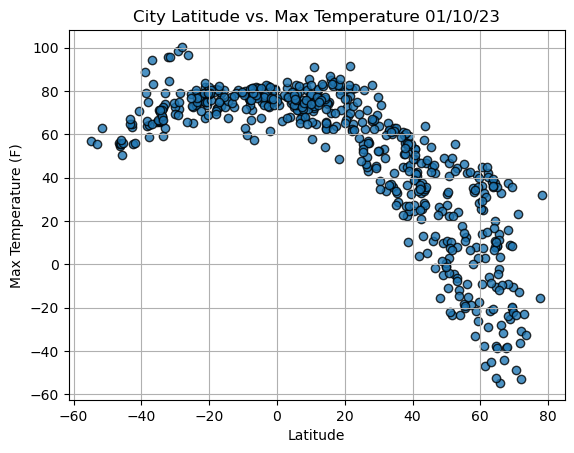

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

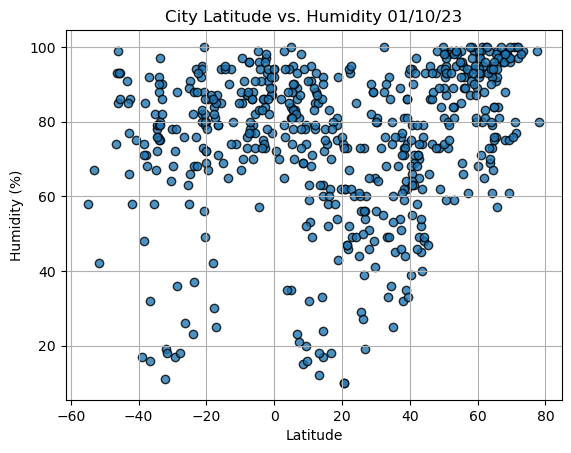

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

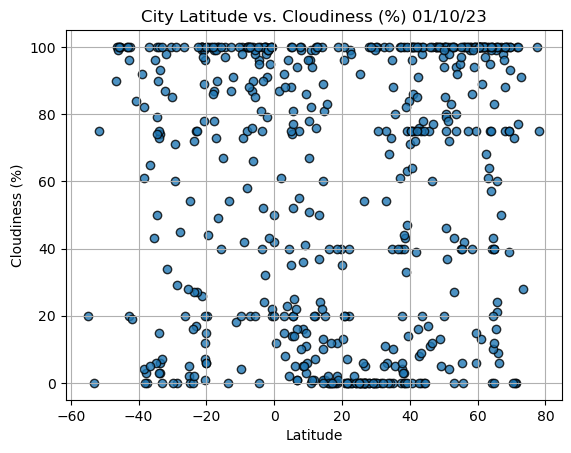

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

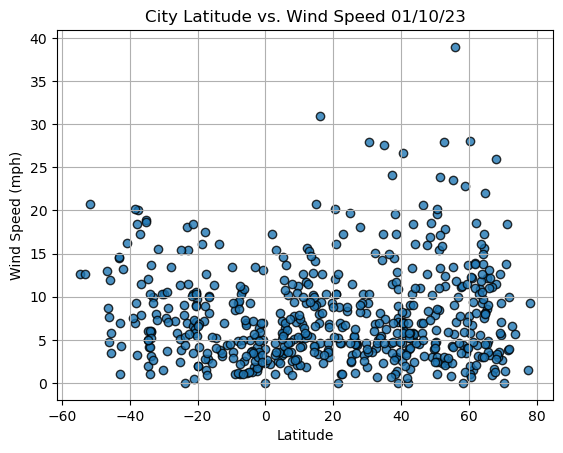

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                 Constitucion
Country                        CL
Date          2023-01-10 22:05:57
Lat                      -35.3333
Lng                      -72.4167
Max Temp                    65.64
Humidity                       58
Cloudiness                     43
Wind Speed                   18.9
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
562     True
563     True
564    False
565     True
566    False
Name: Lat, Length: 567, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Georgetown,MY,2023-01-10 22:06:21,5.4112,100.3354,78.73,83,20,5.75
3,Ponta Do Sol,PT,2023-01-10 22:05:44,32.6667,-17.1000,65.03,76,11,4.09
4,Torbay,CA,2023-01-10 22:05:46,47.6666,-52.7314,26.58,93,100,15.99
7,Pevek,RU,2023-01-10 22:07:06,69.7008,170.3133,-10.71,96,100,2.66
8,Barrow,US,2023-01-10 22:07:07,71.2906,-156.7887,-12.98,77,0,18.41


In [28]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

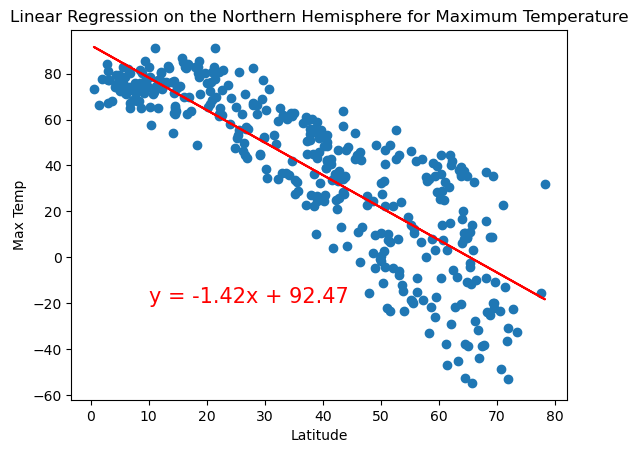

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \
for Maximum Temperature', 'Max Temp', (10,-20))

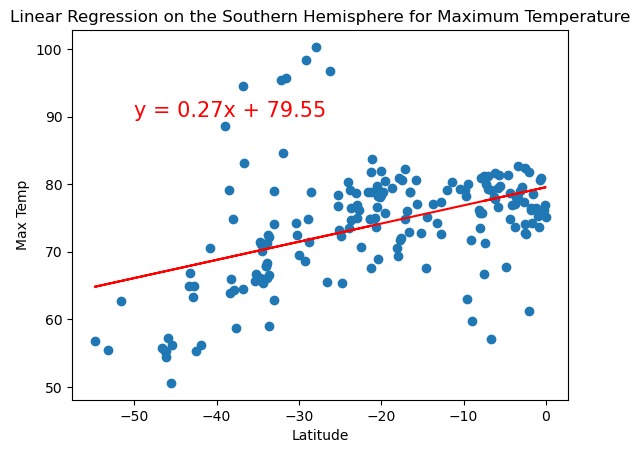

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \
for Maximum Temperature', 'Max Temp', (-50,90))

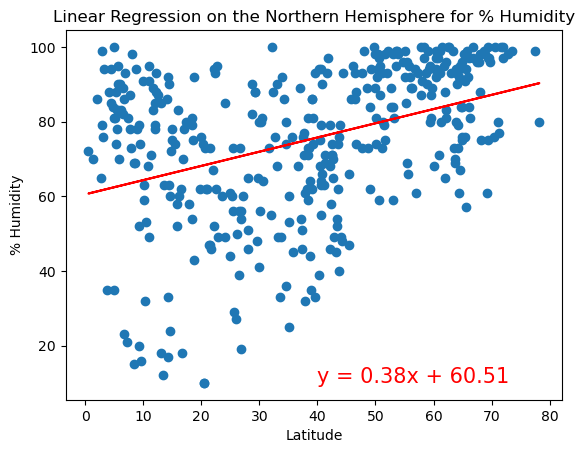

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for % Humidity', '% Humidity',(40,10))

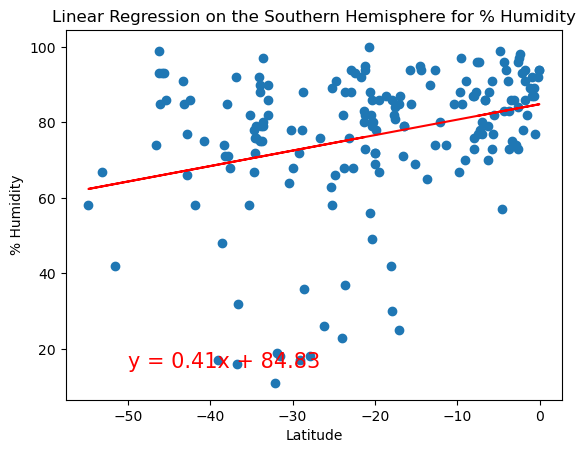

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Humidity', '% Humidity',(-50,15))

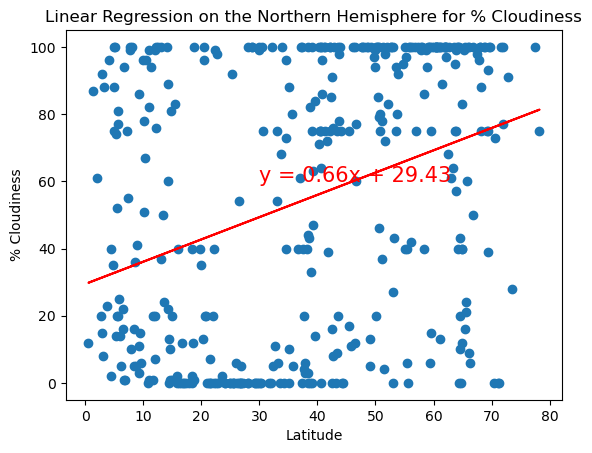

In [40]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \
for % Cloudiness', '% Cloudiness', (30,60))

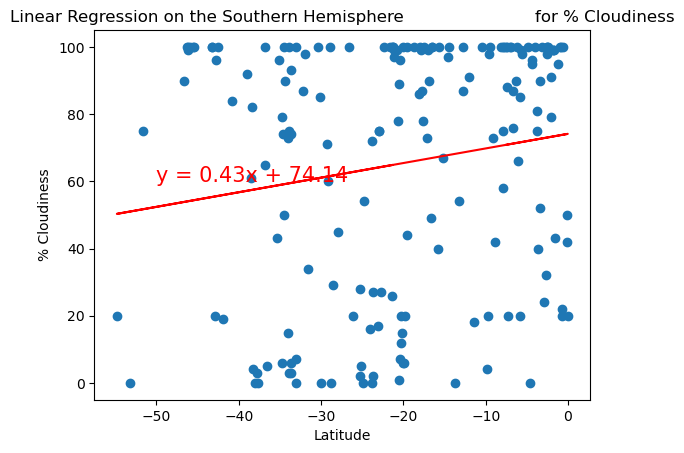

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Cloudiness', '% Cloudiness',(-50,60))